In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Load dataset
file_path = 'data.csv'  # Update with correct path if needed
data = pd.read_csv(file_path)

# Display first 5 rows to check the data
data.head()


,Patient_ID,Age,Gender,Weight,Height,BMI,Carbohydrate_Intake,Protein_Intake,Fat_Intake,Total_Calories,Blood_Glucose_Level,Meal_Timing,Activity_Level,Diabetes_Type,Basal_Insulin_Dose,Bolus_Insulin_Dose,Time_Since_Last_Meal,Blood_Glucose_Status
0,P_1,61,Female,115.9,1.69,40.6,125.7,78.9,31.2,1099.2,234.6,Snack,Low,Type 1,10.0,3.8,3,High
1,P_2,24,Male,60.2,1.50,26.8,111.9,65.8,37.3,1046.5,143.7,Dinner,High,Type 1,3.1,2.9,4,Normal
2,P_3,70,Male,68.7,1.69,24.1,145.7,63.0,10.6,930.2,164.3,Breakfast,Low,Type 1,7.1,5.4,2,Normal
3,P_4,30,Male,70.3,1.90,19.5,127.5,57.6,32.0,1028.4,211.3,Breakfast,Moderate,Type 1,1.7,1.3,5,High
4,P_5,33,Male,88.4,1.80,27.3,137.4,21.6,29.8,904.2,170.8,Lunch,Low,Type 1,6.2,3.2,1,Normal


In [15]:
# Drop non-relevant or ID-like columns
if 'Patient_ID' in data.columns:
    data = data.drop(columns=['Patient_ID'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Meal_Timing', 'Activity_Level', 'Diabetes_Type', 'Blood_Glucose_Status']
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Check processed data
data.head()


,Age,Gender,Weight,Height,BMI,Carbohydrate_Intake,Protein_Intake,Fat_Intake,Total_Calories,Blood_Glucose_Level,Meal_Timing,Activity_Level,Diabetes_Type,Basal_Insulin_Dose,Bolus_Insulin_Dose,Time_Since_Last_Meal,Blood_Glucose_Status
0,61,0,115.9,1.69,40.6,125.7,78.9,31.2,1099.2,234.6,3,1,0,10.0,3.8,3,0
1,24,1,60.2,1.50,26.8,111.9,65.8,37.3,1046.5,143.7,1,0,0,3.1,2.9,4,2
2,70,1,68.7,1.69,24.1,145.7,63.0,10.6,930.2,164.3,0,1,0,7.1,5.4,2,2
3,30,1,70.3,1.90,19.5,127.5,57.6,32.0,1028.4,211.3,0,2,0,1.7,1.3,5,0
4,33,1,88.4,1.80,27.3,137.4,21.6,29.8,904.2,170.8,2,1,0,6.2,3.2,1,2


In [16]:
# Separate features and target variable
X = data.drop(columns=['Blood_Glucose_Status'])
y = data['Blood_Glucose_Status']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display processed feature set
X_scaled.head()



,Age,Gender,Weight,Height,BMI,Carbohydrate_Intake,Protein_Intake,Fat_Intake,Total_Calories,Blood_Glucose_Level,Meal_Timing,Activity_Level,Diabetes_Type,Basal_Insulin_Dose,Bolus_Insulin_Dose,Time_Since_Last_Meal
0,0.868204,-0.980196,1.575496,-0.442797,1.617993,0.913663,1.741960,0.357752,1.616559,1.467227,1.226365,-0.124035,0.0,0.836771,0.007836,-0.105517
1,-0.896826,1.020204,-0.881874,-1.771887,0.021175,0.559779,1.090732,0.820690,1.354513,-0.265493,-0.513160,-1.364382,0.0,-0.889304,-0.383955,0.648176
2,1.297535,1.020204,-0.506871,-0.442797,-0.291246,1.426540,0.951538,-1.205611,0.776222,0.127181,-1.382922,-0.124035,0.0,0.111319,0.704353,-0.859210
3,-0.610605,1.020204,-0.436282,1.026198,-0.823518,0.959822,0.683093,0.418465,1.264513,1.023087,-1.382922,1.116313,0.0,-1.239522,-1.080472,1.401868
4,-0.467494,1.020204,0.362253,0.326676,0.079031,1.213696,-1.106540,0.251504,0.646940,0.251082,0.356603,-0.124035,0.0,-0.113821,-0.253358,-1.612902


In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 16), (20, 16), (80,), (20,))

In [18]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Check initialized models
models


{'Random Forest': RandomForestClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000),
 'SVM': SVC(),
 'KNN': KNeighborsClassifier()}

In [19]:
# Store results
accuracy_scores = {}

# Train, evaluate, and cross-validate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    
    accuracy_scores[name] = accuracy
    
    print(f"🔹 Model: {name}")
    print(f"✅ Test Accuracy: {accuracy:.4f}")


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


🔹 Model: Random Forest
✅ Test Accuracy: 1.0000
🔹 Model: Logistic Regression
✅ Test Accuracy: 0.9000
🔹 Model: SVM
✅ Test Accuracy: 0.9500


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


🔹 Model: KNN
✅ Test Accuracy: 0.7000


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


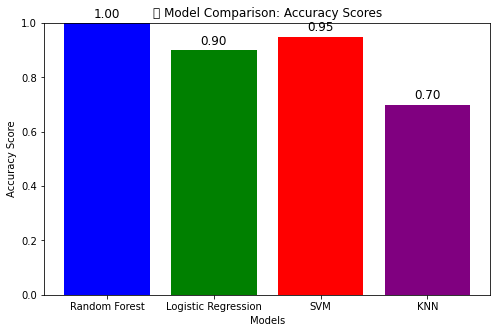

In [20]:
# Plot accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("📊 Model Comparison: Accuracy Scores")
plt.ylim(0, 1)

# Annotate bars with accuracy values
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


In [21]:
import pickle

# Save the best model (you can change the model name if needed)
best_model = models["Random Forest"]  # Example: Saving Random Forest

# Save the model as a pickle file
pickle_filename = "blood_glucose_model.pkl"
with open(pickle_filename, "wb") as file:
    pickle.dump(best_model, file)

print(f"✅ Model saved as {pickle_filename}")


✅ Model saved as blood_glucose_model.pkl
